In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(open('SurveyData_2022-03-04.xlsx', 'rb'),sheet_name='sheet1')
df.head(7)

VisitDate         SurveyTitle VisitType          VisitFrequency  \
0 2019-12-31  Annual Pass Survey      Paid  I've only visited once   
1 2019-12-31  Annual Pass Survey      Free   Once every 2-3 months   
2 2020-01-01  Annual Pass Survey      Paid             Once a year   
3 2020-01-01  Annual Pass Survey      Paid  I've only visited once   
4 2019-12-31  Annual Pass Survey      Paid             Once a year   
5 2020-01-01  Annual Pass Survey      Paid  I've only visited once   
6 2020-01-01  Annual Pass Survey      Paid  I've only visited once   

  ChildrenUnder12 PartySize StayTime  OverallNPS  CateringNPS  RetailNPS  ...  \
0              No         3  4 Hours         1.0         -1.0         -1  ...   
1              No         2  2 Hours        -1.0         -1.0         -1  ...   
2              No         1  5 Hours         0.0          0.0          0  ...   
3             Yes         3  5 Hours         1.0         -1.0         -1  ...   
4             Yes         5  5 Hours         1.0          0.0          0  ...   
5              No         2  3 Hours         1.0          0.0          0  ...   
6              No         3  3 Hours         1.0          0.0          0  ...   

   Cafe_Stables Cafe_Pizza Cafe_Orangery Cafe_CoffeeStall Cafe_Icecream  \
0             0          0             0                0             0   
1             0          0             0                0             0   
2             1          0             0                0             0   
3             0          0             0                0             0   
4             0          1             0                0             0   
5             1          0             0                0             0   
6             0          0             0                0             0   

  Service_AdmissionsAndWelcome  Service_TourGuide  Service_RetailTeam  \
0                          7.0                NaN                 8.0   
1                          5.0                NaN                 NaN   
2                          8.0                8.0                 8.0   
3                          8.0                8.0                 8.0   
4                          8.0                7.0                 8.0   
5                         10.0               10.0                10.0   
6                         10.0               10.0                10.0   

   Service_CateringTeam  Service_AnnualPass  
0                   8.0                 9.0  
1                   6.0                 6.0  
2                   8.0                 8.0  
3                   6.0                 8.0  
4                   8.0                10.0  
5                  10.0                10.0  
6                  10.0                10.0  

[7 rows x 35 columns]

# Data Preparation and EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17619 entries, 0 to 17618
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   VisitDate                     17619 non-null  datetime64[ns]
 1   SurveyTitle                   17619 non-null  object        
 2   VisitType                     17619 non-null  object        
 3   VisitFrequency                17619 non-null  object        
 4   ChildrenUnder12               17619 non-null  object        
 5   PartySize                     17619 non-null  object        
 6   StayTime                      17619 non-null  object        
 7   OverallNPS                    17618 non-null  float64       
 8   CateringNPS                   8860 non-null   float64       
 9   RetailNPS                     17619 non-null  int64         
 10  ValueForMoney                 17618 non-null  float64       
 11  VisitorSegment              

In [4]:
df.nunique()

VisitDate                         881
SurveyTitle                         1
VisitType                           2
VisitFrequency                      7
ChildrenUnder12                     2
PartySize                           6
StayTime                            6
OverallNPS                          3
CateringNPS                         2
RetailNPS                           3
ValueForMoney                      10
VisitorSegment                      7
MostEnjoyed                     13386
CouldImprove                     6115
UseShopMore                      4395
UseCafeMore                      3890
Activity_TookATour                  2
Activity_VisitedGardens             2
Activity_WalkedAroundPark           2
Activity_Event                      2
Activity_Cafe                       2
Activity_Shop                       2
Activity_Exhibition                 2
Activity_Other                   1281
Cafe_Pantry                         2
Cafe_Stables                        2
Cafe_Pizza  

In [5]:
# We can see that SurveyTitle can be removed cause it contains the same value for all observations.
df.drop(["SurveyTitle"],axis=1,inplace=True)
df.head(5)

VisitDate VisitType          VisitFrequency ChildrenUnder12 PartySize  \
0 2019-12-31      Paid  I've only visited once              No         3   
1 2019-12-31      Free   Once every 2-3 months              No         2   
2 2020-01-01      Paid             Once a year              No         1   
3 2020-01-01      Paid  I've only visited once             Yes         3   
4 2019-12-31      Paid             Once a year             Yes         5   

  StayTime  OverallNPS  CateringNPS  RetailNPS  ValueForMoney  ...  \
0  4 Hours         1.0         -1.0         -1            7.0  ...   
1  2 Hours        -1.0         -1.0         -1            1.0  ...   
2  5 Hours         0.0          0.0          0            8.0  ...   
3  5 Hours         1.0         -1.0         -1            7.0  ...   
4  5 Hours         1.0          0.0          0            8.0  ...   

  Cafe_Stables Cafe_Pizza Cafe_Orangery Cafe_CoffeeStall Cafe_Icecream  \
0            0          0             0                0             0   
1            0          0             0                0             0   
2            1          0             0                0             0   
3            0          0             0                0             0   
4            0          1             0                0             0   

   Service_AdmissionsAndWelcome  Service_TourGuide  Service_RetailTeam  \
0                           7.0                NaN                 8.0   
1                           5.0                NaN                 NaN   
2                           8.0                8.0                 8.0   
3                           8.0                8.0                 8.0   
4                           8.0                7.0                 8.0   

   Service_CateringTeam  Service_AnnualPass  
0                   8.0                 9.0  
1                   6.0                 6.0  
2                   8.0                 8.0  
3                   6.0                 8.0  
4                   8.0                10.0  

[5 rows x 34 columns]

In [6]:
df["VisitDate"] = pd.to_datetime(df["VisitDate"])

In [7]:
# Sorting the observations based on dates, so that we can infer better meanings in terms of events and time specific surveys
df.sort_values(by='VisitDate', inplace=True)
df.reset_index(drop=True)
#df.drop(["index"],axis=1,inplace=True)

VisitDate VisitType          VisitFrequency ChildrenUnder12 PartySize  \
0     2018-10-10      Free   Once every 4-6 months             Yes        6+   
1     2018-12-30      Paid   Once every 4-6 months              No         4   
2     2019-01-05      Free             Once a year             Yes         4   
3     2019-02-08      Free   Once every 2-3 months              No         2   
4     2019-05-13      Paid   Once every 2-3 months             Yes         5   
...          ...       ...                     ...             ...       ...   
17614 2022-03-01      Free  I've only visited once              No         2   
17615 2022-03-02      Paid            Once a month              No         2   
17616 2022-03-03      Free             Once a year              No         2   
17617 2022-03-03      Paid   Once every 2-3 months              No         2   
17618 2022-03-04      Paid  I've only visited once              No         2   

       StayTime  OverallNPS  CateringNPS  RetailNPS  ValueForMoney  ...  \
0      6+ Hours         0.0         -1.0          0            8.0  ...   
1       3 Hours         1.0         -1.0         -1            9.0  ...   
2       4 Hours         1.0          0.0          1           10.0  ...   
3       4 Hours         1.0          0.0          1            8.0  ...   
4       3 Hours         1.0          0.0          0            8.0  ...   
...         ...         ...          ...        ...            ...  ...   
17614    1 Hour        -1.0          0.0         -1            5.0  ...   
17615    1 Hour         1.0         -1.0         -1            5.0  ...   
17616   2 Hours         1.0          0.0          1           10.0  ...   
17617   4 Hours         0.0          0.0          0            8.0  ...   
17618   5 Hours         1.0          0.0         -1            9.0  ...   

      Cafe_Stables Cafe_Pizza Cafe_Orangery Cafe_CoffeeStall Cafe_Icecream  \
0                1          0             0                0             0   
1                0          0             0                0             0   
2                1          0             0                0             0   
3                1          0             0                0             0   
4                1          0             0                0             0   
...            ...        ...           ...              ...           ...   
17614            0          0             0                0             0   
17615            0          0             0                0             0   
17616            0          0             0                0             0   
17617            1          0             0                0             0   
17618            1          0             0                0             0   

       Service_AdmissionsAndWelcome  Service_TourGuide  Service_RetailTeam  \
0                               9.0               10.0                 9.0   
1                              10.0                9.0                 NaN   
2                               9.0               10.0                10.0   
3                               9.0               10.0                 9.0   
4                               9.0                9.0                 9.0   
...                             ...                ...                 ...   
17614                           NaN                NaN                 NaN   
17615                           6.0                NaN                 9.0   
17616                           9.0               10.0                10.0   
17617                           8.0                8.0                 7.0   
17618                          10.0                8.0                 NaN   

       Service_CateringTeam  Service_AnnualPass  
0                       8.0                10.0  
1                       NaN                10.0  
2                       9.0                10.0  
3                       8.0                 9.0  
4                    

In [8]:
# Checkpoint 1
prime_df = df.copy()
prime_df.head(5)

VisitDate VisitType         VisitFrequency ChildrenUnder12 PartySize  \
1237 2018-10-10      Free  Once every 4-6 months             Yes        6+   
34   2018-12-30      Paid  Once every 4-6 months              No         4   
398  2019-01-05      Free            Once a year             Yes         4   
444  2019-02-08      Free  Once every 2-3 months              No         2   
33   2019-05-13      Paid  Once every 2-3 months             Yes         5   

      StayTime  OverallNPS  CateringNPS  RetailNPS  ValueForMoney  ...  \
1237  6+ Hours         0.0         -1.0          0            8.0  ...   
34     3 Hours         1.0         -1.0         -1            9.0  ...   
398    4 Hours         1.0          0.0          1           10.0  ...   
444    4 Hours         1.0          0.0          1            8.0  ...   
33     3 Hours         1.0          0.0          0            8.0  ...   

     Cafe_Stables Cafe_Pizza Cafe_Orangery Cafe_CoffeeStall Cafe_Icecream  \
1237            1          0             0                0             0   
34              0          0             0                0             0   
398             1          0             0                0             0   
444             1          0             0                0             0   
33              1          0             0                0             0   

      Service_AdmissionsAndWelcome  Service_TourGuide  Service_RetailTeam  \
1237                           9.0               10.0                 9.0   
34                            10.0                9.0                 NaN   
398                            9.0               10.0                10.0   
444                            9.0               10.0                 9.0   
33                             9.0                9.0                 9.0   

      Service_CateringTeam  Service_AnnualPass  
1237                   8.0                10.0  
34                     NaN                10.0  
398                    9.0                10.0  
444                    8.0                 9.0  
33                     7.0                10.0  

[5 rows x 34 columns]

In [9]:
# free text responses
text_features = ["MostEnjoyed","CouldImprove","UseShopMore","UseCafeMore","Activity_Other"]
# ratings from 0-10 
rating_features = ["ValueForMoney","Service_AdmissionsAndWelcome","Service_TourGuide","Service_RetailTeam",
                  "Service_CateringTeam","Service_AnnualPass"]

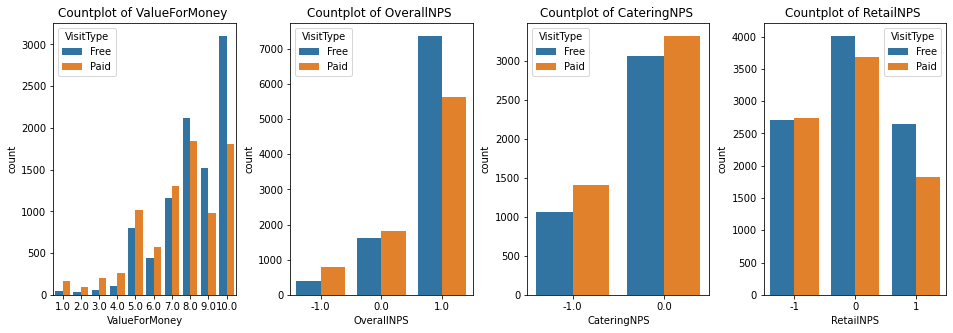

In [10]:
# Customers who visited for free, tended to be low in low ratings and high in high ratings when compared to ratings of 
# paid customers. 
plt.figure(1,figsize = (16 , 5))
n = 0 
for x in ['ValueForMoney' , 'OverallNPS', "CateringNPS", "RetailNPS"]:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.3)
    sns.countplot(df[x] , hue=df["VisitType"])
    plt.title('Countplot of {} '.format(x))
plt.show()

In [11]:
# Converting PartySize data type to integers from strings for analysis. Will denote 6+ inside analysis, now just using 6.
pSize = []
for i in df["PartySize"]:
    if(i == "6+"):
        j = i.split("+")
        pSize.append(int(j[0]))
    else:
        j = i.split(" ")
        pSize.append(int(j[0]))
# pSize[:10]
df["PartySize"] = pSize

In [12]:
# Converting StayTime data type to integers like above. Will denote 6+ inside analysis, now just using 6.
sTime = []
m = 0
for i in df["StayTime"]:
    sTime.append(int(list(i)[0]))
# sTime[:10]
df["StayTime"] = sTime

In [13]:
# Checkpoint 2
prime_df = df.copy()
prime_df.head(5)

VisitDate VisitType         VisitFrequency ChildrenUnder12  PartySize  \
1237 2018-10-10      Free  Once every 4-6 months             Yes          6   
34   2018-12-30      Paid  Once every 4-6 months              No          4   
398  2019-01-05      Free            Once a year             Yes          4   
444  2019-02-08      Free  Once every 2-3 months              No          2   
33   2019-05-13      Paid  Once every 2-3 months             Yes          5   

      StayTime  OverallNPS  CateringNPS  RetailNPS  ValueForMoney  ...  \
1237         6         0.0         -1.0          0            8.0  ...   
34           3         1.0         -1.0         -1            9.0  ...   
398          4         1.0          0.0          1           10.0  ...   
444          4         1.0          0.0          1            8.0  ...   
33           3         1.0          0.0          0            8.0  ...   

     Cafe_Stables Cafe_Pizza Cafe_Orangery Cafe_CoffeeStall Cafe_Icecream  \
1237            1          0             0                0             0   
34              0          0             0                0             0   
398             1          0             0                0             0   
444             1          0             0                0             0   
33              1          0             0                0             0   

      Service_AdmissionsAndWelcome  Service_TourGuide  Service_RetailTeam  \
1237                           9.0               10.0                 9.0   
34                            10.0                9.0                 NaN   
398                            9.0               10.0                10.0   
444                            9.0               10.0                 9.0   
33                             9.0                9.0                 9.0   

      Service_CateringTeam  Service_AnnualPass  
1237                   8.0                10.0  
34                     NaN                10.0  
398                    9.0                10.0  
444                    8.0                 9.0  
33                     7.0                10.0  

[5 rows x 34 columns]

Text(0.5, 1.0, 'Stay Time varying with party size')

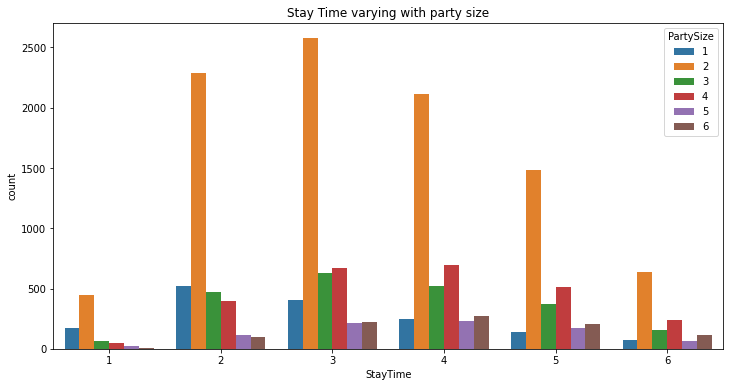

In [14]:
# We can see that usually party size of 2 stays longer than most. Party size of 6+ usually stay from 2-5 hours. More info can
# be derived from this single visualization. 
plt.figure(1,figsize = (12 , 6))
sns.countplot(df["StayTime"],hue=df["PartySize"])
plt.title("Stay Time varying with party size")

In [15]:
# However, my intuition was correct about the biasness of the data towards party of 2, as number of observations for party
# size of 2 in this dataset is much more than the other groups. 
df["PartySize"].value_counts()

2    9546
4    2570
3    2199
1    1557
6     916
5     831
Name: PartySize, dtype: int64

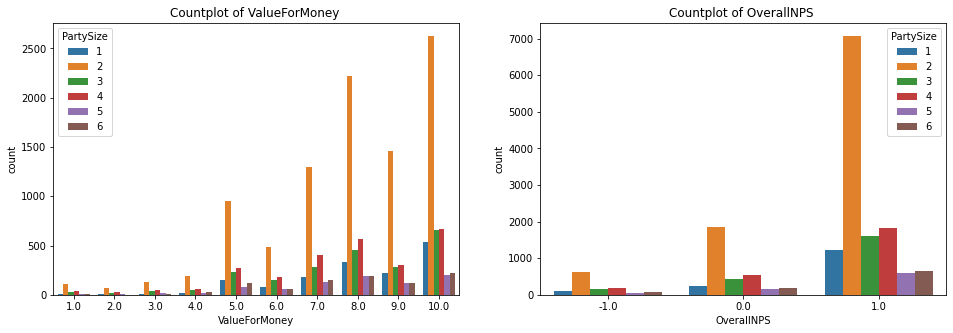

In [16]:
# Next we see for this specific dataset, solo customers usually are low in number compared to larger groups, when it comes to
# giving a high rating for the experience. Again due to imbalance in sample, we see party size of two dominating the rating
# space. Groups of 3-4 have usually given pretty high ratings of the experience. 
plt.figure(1,figsize = (16 , 5))
n = 0 
for x in ['ValueForMoney' , 'OverallNPS']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.2)
    sns.countplot(df[x] , hue=df["PartySize"])
    plt.title('Countplot of {} '.format(x))
plt.show()

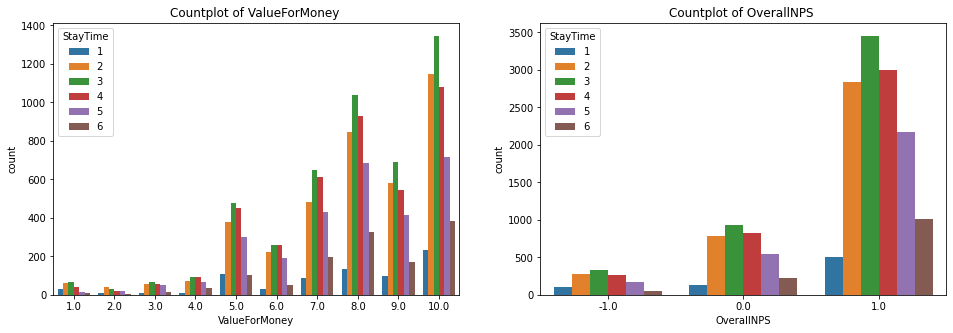

In [17]:
# Another observation is that people who have stayed around 2-5 hours have given much higher ratings. 
plt.figure(1,figsize = (16 , 5))
n = 0 
for x in ['ValueForMoney' , 'OverallNPS']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.2)
    sns.countplot(df[x] , hue=df["StayTime"])
    plt.title('Countplot of {} '.format(x))
plt.show()

<AxesSubplot:xlabel='ChildrenUnder12', ylabel='count'>

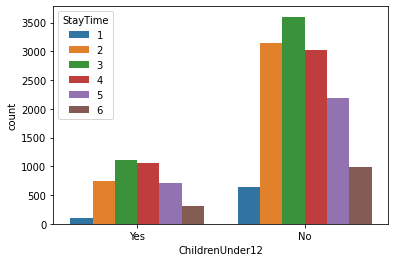

In [18]:
# Groups without children under 12 tended to stay longer than those with children under 12. 
sns.countplot(df["ChildrenUnder12"],hue = df["StayTime"])

<AxesSubplot:>

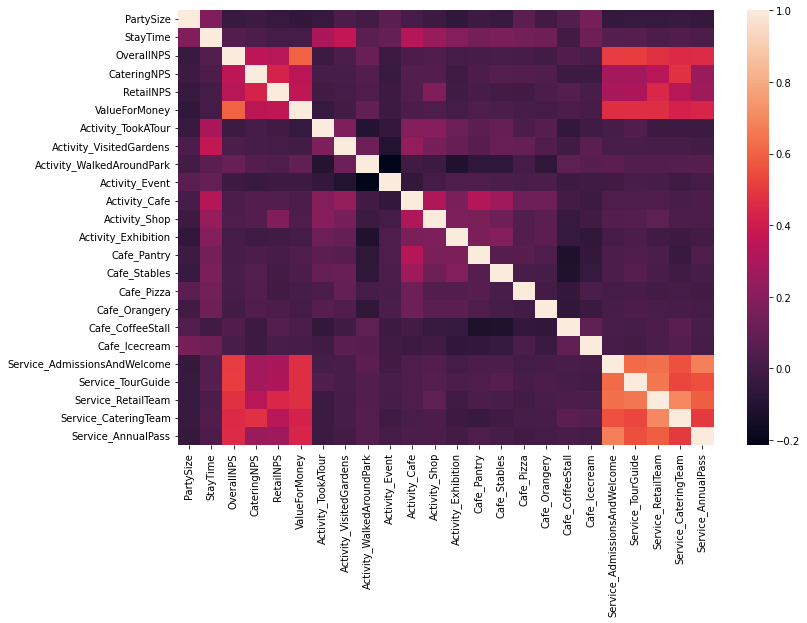

In [19]:
# Plotting the heatmap of the correlations between all the features, we can see an interesting phenomenon that there are 
# correlations between the NPS scores and the overall satisfaction of the experience with services ratings. 
plt.figure(1,figsize = (12 , 8))
sns.heatmap(df.corr())

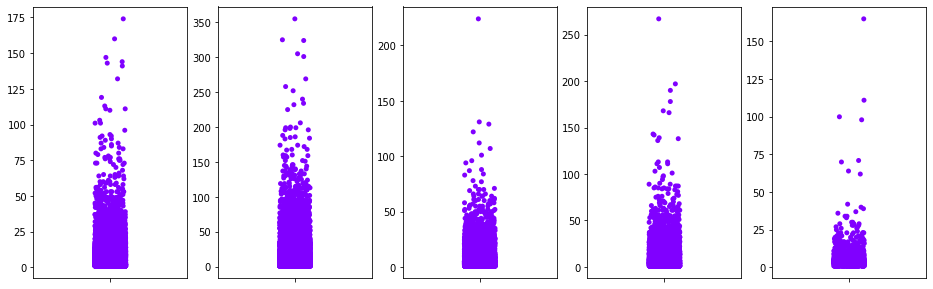

In [20]:
# Now lets see the distributions of the lengths of the text responses. 
def response_lengths(col):
    feature = list(col.dropna())
    leng = []
    for i in feature:
        s = i.split(" ")
        leng.append(len(s))
    return leng

# a list to store the collective lists of frequencies of the individual text features
text_cols = []
for c in text_features:
    text_cols.append(response_lengths(df[c]))

# finally now plotting 
plt.figure(1,figsize = (16 , 5))
n = 0 
for x in text_cols:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.2)
    # the strip plot shows the lengths of the text responses in each of the columns
    sns.stripplot(y= x,palette=["#8000ff"],jitter=1)
    #plt.title('Countplot of {} '.format(x))
plt.show()

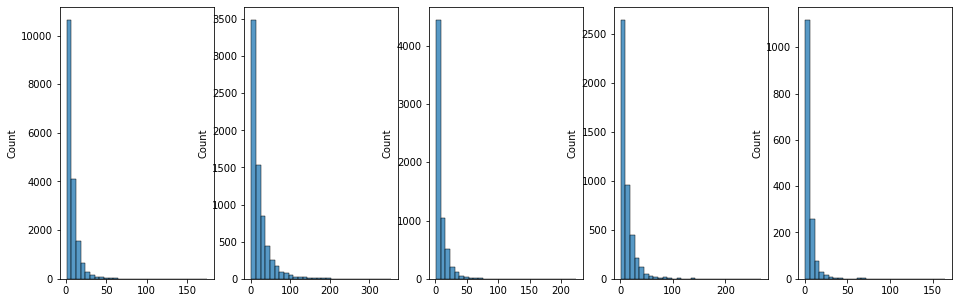

In [21]:
plt.figure(1,figsize = (16 , 5))
n = 0 
for x in text_cols:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.2)
    #sns.kdeplot(x)
    # the hist plot shows the frequencies of the different responses of varying length
    sns.histplot(x,bins=30)
    #plt.title('Countplot of {} '.format(x))
plt.show()

In [22]:
df["VisitFrequency"].value_counts()

I've only visited once      5532
Once every 2-3 months       3053
Once a month                2444
Once a fortnight or more    2141
Once every 4-6 months       1992
Less often                  1336
Once a year                 1121
Name: VisitFrequency, dtype: int64

<AxesSubplot:xlabel='ValueForMoney', ylabel='Density'>

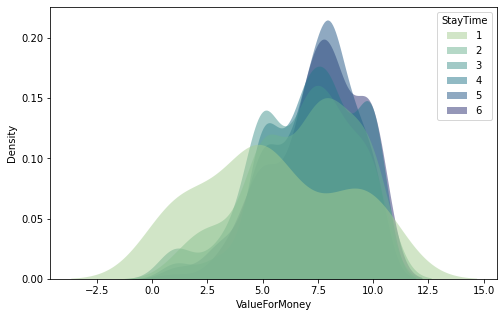

In [23]:
# Trying to understand relationship between StayTime and VisitFrequency. (1)
plt.figure(figsize=(8,5))
once_visit = df[df["VisitFrequency"]=="Less often"]
sns.kdeplot(once_visit["ValueForMoney"],hue=once_visit["StayTime"],fill=True, common_norm=False, palette="crest",
            alpha=.5, linewidth=0)

<AxesSubplot:xlabel='ValueForMoney', ylabel='Density'>

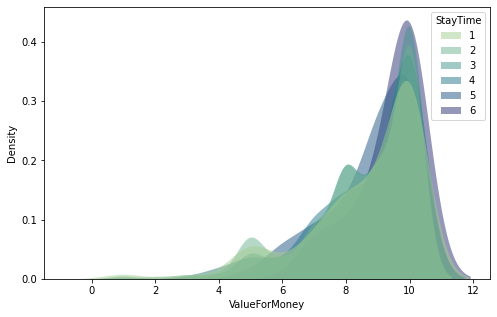

In [24]:
# Trying to understand relationship between StayTime and VisitFrequency. (2)
plt.figure(figsize=(8,5))
once_visit = df[df["VisitFrequency"]=="Once a fortnight or more"]
sns.kdeplot(once_visit["ValueForMoney"],hue=once_visit["StayTime"],fill=True, common_norm=False, palette="crest",
            alpha=.5, linewidth=0)

In [25]:
df["VisitorSegment"].value_counts()

Social Mindset         9100
Tick Box               3303
Special Focus          2089
Child Engagement       1330
Broadening Horizons    1223
Topic Interest          308
Big Kid                 266
Name: VisitorSegment, dtype: int64

# Topic Modelling

## Latent Dirichlet Allocation (LDA)

In [26]:
# import the necessary libraries
import random
import re
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
import nltk
from nltk.corpus import stopwords
from nltk import tokenize

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [27]:
# getting the text responses for preprocessing before topic modelling
most_enjoyed = list(df["MostEnjoyed"].dropna())
could_improve = list(df["CouldImprove"].dropna())
use_shop_more = list(df["UseShopMore"].dropna())
use_cafe_more = list(df["UseCafeMore"].dropna())
activity_other = list(df["Activity_Other"].dropna())

In [35]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(["I'm","like","even","get","goes","would","yes",
               "so","also","I'll","thing","im","let","still","yet","one",
               "want","never","much","really","know","go","since","make","could","I've","day","tell","happen","though","having","have",
              "without","with","back","nothing","something","got","get","told","everything","around","before","after","going",
              "think","way","getting","thinking","said","say","told","already","give","gave","can't","anything","come","came",
              "good","keep","away","thought","makes","make","things","many","good","don't","dont","days","away","well","always","able","see",
               "everyday","called","every","bad","seem","almost","another","lot","cant","asked","part","self","took","happened","happen",
               "find","found","next","point","living","made","either","put","fucking","year","little","take","years","done","worse","else","x200B",
               "probably","wanna","mean","might","person","hour","people","everyone","u","ago","ever","week","went","seems","right","fuck","new",
               "maybe","someone","mom","month","head","actually","guess","happy","used","die","gonna","stuff","saying","trying","months","dead",
               "happiness","big","world","better","left","live","feel","last","felt","wanted","want","honestly","sometime","sometimes","idk","started",
               "sure","later","feels","start","least","less","more","most","two","ive","I'd"])
nlp = spacy.load("en_core_web_sm")

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def data_preprocess(col):
    # sentence tokenizing now
    nltk.download('punkt')
    sentences = []
    for i in col:
        s = tokenize.sent_tokenize(i)
        for j in s:
            sentences.append(j)

    # split sentences to arrays of its words    
    data_words = []
    for sen in sentences:
          data_words.append(gensim.utils.simple_preprocess(str(sen), deacc=True))

    # remove stopwords
    data_words_nostops = remove_stopwords(data_words)

    # lemmatization
    data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN'])
    return data_lemmatized


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Lets work an example with ALL MostEnjoyed responses.
ME_lemmatized = data_preprocess(most_enjoyed) 
id2word = corpora.Dictionary(ME_lemmatized)
texts = ME_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


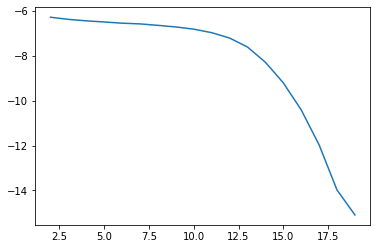

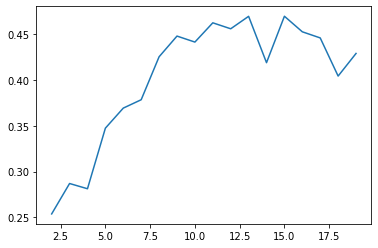

In [38]:
# Before choosing the final model, we determine the best params
perp=[]
cohe=[]
for k in range(2,20):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=k, random_state=100,update_every=1,
                                           chunksize=100,passes=10,alpha='auto',per_word_topics=True)
    perp.append(lda_model.log_perplexity(corpus))
    coherence_model_lda = CoherenceModel(model=lda_model, texts=ME_lemmatized, dictionary=id2word, coherence='c_v')
    cohe.append(coherence_model_lda.get_coherence())
    
# plotting the perplexity and coherence of the trialed models
plt.plot(range(2,20),perp)
plt.show()
plt.plot(range(2,20),cohe)
plt.show()

In [39]:
# final LDA model chosen
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=6, random_state=100,update_every=1,
                                           chunksize=200,passes=10,alpha='auto',per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.161*"palace" + 0.107*"exhibition" + 0.100*"churchill" + 0.068*"tour" + '
  '0.053*"space" + 0.026*"stable" + 0.024*"cafe" + 0.022*"open" + '
  '0.020*"trail" + 0.017*"tree"'),
 (1,
  '0.099*"house" + 0.081*"enjoy" + 0.043*"atmosphere" + 0.040*"room" + '
  '0.037*"see" + 0.036*"christmas" + 0.030*"amazing" + 0.025*"whole" + '
  '0.025*"experience" + 0.023*"child"'),
 (2,
  '0.052*"scenery" + 0.044*"time" + 0.033*"dog" + 0.032*"area" + 0.031*"look" '
  '+ 0.031*"maze" + 0.030*"guide" + 0.028*"helpful" + 0.026*"site" + '
  '0.026*"environment"'),
 (3,
  '0.110*"visit" + 0.070*"staff" + 0.059*"love" + 0.048*"friendly" + '
  '0.029*"blenheim" + 0.029*"nice" + 0.029*"pass" + 0.026*"interesting" + '
  '0.019*"quiet" + 0.019*"explore"'),
 (4,
  '0.082*"surrounding" + 0.080*"history" + 0.061*"great" + 0.035*"pleasant" + '
  '0.033*"tea" + 0.029*"family" + 0.027*"lot" + 0.027*"food" + 0.025*"friend" '
  '+ 0.024*"landscape"'),
 (5,
  '0.146*"walk" + 0.138*"garden" + 0.112*"beautiful" +

In [40]:
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.418948  0.001855       1        1  30.855148
0     -0.081281 -0.381807       2        1  16.304000
1     -0.080753  0.179866       3        1  15.976141
3     -0.089020  0.083306       4        1  13.723142
2     -0.088161  0.066314       5        1  12.550205
4     -0.079733  0.050467       6        1  10.591364, topic_info=            Term         Freq        Total Category  logprob  loglift
30          walk  3038.000000  3038.000000  Default  30.0000  30.0000
55        garden  2875.000000  2875.000000  Default  29.0000  29.0000
27        palace  1779.000000  1779.000000  Default  28.0000  28.0000
23     beautiful  2345.000000  2345.000000  Default  27.0000  27.0000
67    exhibition  1182.000000  1182.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
871        watch    47.716098    48.521772   Topic6  -5.0116   2.2284
255    generally    46.153858    46.975093   Topic6  -5.0449   2.2275
1053       drink    45.194340    45.998726   Topic6  -5.0659   2.2275
412      service    43.635806    44.442571   Topic6  -5.1010   2.2268
117      magical    45.510666    46.352975   Topic6  -5.0589   2.2268

[217 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
112       6  0.985086  absolutely
406       6  0.993478   afternoon
141       1  0.997977         air
25        3  0.996923     amazing
9         1  0.995044      annual
...     ...       ...         ...
82        3  0.996933       whole
132       1  0.994781     winston
31        1  0.996909   wonderful
591       4  0.988545        work
183       3  0.993955        xmas

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 2, 4, 3, 5])

In [41]:
# Now I will try another approach which will make sense of the topics better. I will separate the customer records whose overall experience was the
# worst from those with the best experience. Then applying LDA on them separately can help us better understand, what customers are saying from 
#the "MostEnjoyed" response. Obviously, customers with more positive overall experience may have a different responses than their counterpart.

In [42]:
# We divide the customers based on the extreme value of their experience based on the data at hand. We use the metric "ValueForMoney" to do this.
most_satisfied_customers = df[df["ValueForMoney"] == 10.0]
least_satisfied_customers = df[df["ValueForMoney"] == 1.0]

In [43]:
most_enjoyed_10 = list(most_satisfied_customers["MostEnjoyed"].dropna())
most_enjoyed_1 = list(least_satisfied_customers["MostEnjoyed"].dropna())

In [44]:
# Topics with LDA from "MostEnjoyed" response, based on the most satisfied customers
ME_lemmatized_10 = data_preprocess(most_enjoyed_10) 
id2word_10 = corpora.Dictionary(ME_lemmatized_10)
texts_10 = ME_lemmatized_10
corpus_10 = [id2word_10.doc2bow(text) for text in texts_10]

lda_model_10 = gensim.models.ldamodel.LdaModel(corpus=corpus_10,id2word=id2word_10,num_topics=4, random_state=100,update_every=1,
                                           chunksize=100,passes=10,alpha='auto',per_word_topics=True)
pprint(lda_model_10.print_topics())
doc_lda_10 = lda_model_10[corpus_10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(0,
  '0.079*"visit" + 0.057*"place" + 0.040*"scenery" + 0.026*"wonderful" + '
  '0.025*"time" + 0.024*"christmas" + 0.023*"room" + 0.023*"blenheim" + '
  '0.015*"weather" + 0.014*"tea"'),
 (1,
  '0.084*"walk" + 0.082*"beautiful" + 0.072*"garden" + 0.056*"palace" + '
  '0.047*"ground" + 0.036*"lovely" + 0.032*"exhibition" + 0.030*"staff" + '
  '0.028*"churchill" + 0.026*"house"'),
 (2,
  '0.043*"space" + 0.038*"view" + 0.027*"dog" + 0.026*"look" + 0.023*"beauty" '
  '+ 0.022*"interesting" + 0.022*"pass" + 0.021*"excellent" + 0.021*"peace" + '
  '0.019*"informative"'),
 (3,
  '0.064*"park" + 0.052*"love" + 0.038*"great" + 0.035*"whole" + '
  '0.032*"atmosphere" + 0.026*"relax" + 0.025*"experience" + 0.022*"round" + '
  '0.021*"event" + 0.020*"cafe"')]


In [45]:
pyLDAvis.enable_notebook()
visualization_10 = pyLDAvis.gensim_models.prepare(lda_model_10, corpus_10, id2word_10)
visualization_10

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.359412  0.002758       1        1  44.839212
0     -0.126699  0.240879       2        1  20.375778
3     -0.120724 -0.256798       3        1  18.372433
2     -0.111990  0.013160       4        1  16.412576, topic_info=          Term        Freq       Total Category  logprob  loglift
8         walk  802.000000  802.000000  Default  30.0000  30.0000
32   beautiful  786.000000  786.000000  Default  29.0000  29.0000
19       visit  344.000000  344.000000  Default  28.0000  28.0000
29      garden  686.000000  686.000000  Default  27.0000  27.0000
47        park  253.000000  253.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
393        old   23.139524   23.885195   Topic4  -5.0205   1.7754
162   activity   22.900613   23.649689   Topic4  -5.0308   1.7749
197        car   22.460827   23.212748   Topic4  -5.0502   1.7742
611     plenty   22.090330   22.831253   Topic4  -5.0669   1.7741
778      buggy   25.088643   26.012975   Topic4  -4.9396   1.7709

[153 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
162       4  0.972529   activity
141       2  0.978211  afternoon
223       2  0.977591        air
3         1  0.993197    amazing
382       4  0.990978     annual
...     ...       ...        ...
240       2  0.986180    weather
128       3  0.996204      whole
228       2  0.985296    winston
117       2  0.989063  wonderful
362       3  0.981672       work

[123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

In [46]:
# Topics with LDA from "MostEnjoyed" response, based on the least satisfied customers
ME_lemmatized_1 = data_preprocess(most_enjoyed_1) 
id2word_1 = corpora.Dictionary(ME_lemmatized_1)
texts_1 = ME_lemmatized_1
corpus_1 = [id2word_1.doc2bow(text) for text in texts_1]

lda_model_1 = gensim.models.ldamodel.LdaModel(corpus=corpus_1,id2word=id2word_1,num_topics=4, random_state=100,update_every=1,
                                           chunksize=100,passes=10,alpha='auto',per_word_topics=True)
pprint(lda_model_1.print_topics())
doc_lda_10 = lda_model_1[corpus_1]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(0,
  '0.107*"garden" + 0.042*"palace" + 0.023*"see" + 0.017*"close" + '
  '0.015*"lake" + 0.013*"site" + 0.012*"cancel" + 0.012*"park" + 0.012*"book" '
  '+ 0.011*"advice"'),
 (1,
  '0.047*"ground" + 0.034*"visit" + 0.018*"open" + 0.017*"enjoy" + '
  '0.017*"ticket" + 0.016*"beautiful" + 0.015*"scenery" + 0.014*"short" + '
  '0.013*"expensive" + 0.013*"space"'),
 (2,
  '0.050*"walk" + 0.033*"visit" + 0.024*"disappointed" + 0.021*"room" + '
  '0.021*"view" + 0.020*"exhibition" + 0.020*"palace" + 0.019*"lovely" + '
  '0.017*"churchill" + 0.016*"architecture"'),
 (3,
  '0.030*"event" + 0.019*"covid" + 0.016*"dog" + 0.015*"time" + 0.015*"tree" + '
  '0.014*"friend" + 0.011*"cafe" + 0.010*"ticket" + 0.009*"book" + '
  '0.009*"palace"')]


In [47]:
pyLDAvis.enable_notebook()
visualization_1 = pyLDAvis.gensim_models.prepare(lda_model_1, corpus_1, id2word_1)
visualization_1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.139064  0.100440       1        1  27.797684
0      0.157933  0.085941       2        1  26.989394
3      0.027900 -0.111455       3        1  23.834331
1     -0.046770 -0.074926       4        1  21.378592, topic_info=             Term       Freq      Total Category  logprob  loglift
73         garden  29.000000  29.000000  Default  30.0000  30.0000
104          walk  14.000000  14.000000  Default  29.0000  29.0000
101        ground  13.000000  13.000000  Default  28.0000  28.0000
212         event   7.000000   7.000000  Default  27.0000  27.0000
77   disappointed   7.000000   7.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
285       amazing   1.682056   4.684518   Topic4  -4.8349   0.5185
48          queue   1.588441   4.631945   Topic4  -4.8922   0.4726
246    disappoint   1.394229   3.420111   Topic4  -5.0226   0.6454
16         palace   1.725969  20.469260   Topic4  -4.8091  -0.9304
243    exhibition   1.459178   7.319990   Topic4  -4.9771  -0.0700

[182 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
162       4  0.581762  absolutely
18        3  0.581018      access
462       3  0.636394   activitie
455       2  0.791570     advance
421       2  0.866692      advice
...     ...       ...         ...
110       2  0.405572       waste
110       3  0.811143       waste
290       2  0.897178       water
111       2  0.976239     weather
61        3  0.581034     welcome

[169 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [48]:
# After separating the customers, we see that while we do get better interpretable topics, its still not much improvement. So next, I will use another 
# method of Topic Modelling to compare the results with this methodology.

## BERTopic 

In [49]:
from bertopic import BERTopic

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__

In [50]:
# as part of this method, we need full sentences and if the sentences are cleaned, its better. so basically reconverting from lemmatized versions.
def cleaned_reconvert(lem):
    cleaned_sentences = []
    for i in lem:
        k = ""
        for j in i:
            k+=j+" "
        cleaned_sentences.append(k)
    return cleaned_sentences

def topic_model_with_BERT(txt):
    topic_model = BERTopic()
    reconverted = cleaned_reconvert(txt)
    topics, probs = topic_model.fit_transform(reconverted)
    return topic_model

In [51]:
# "MostEnjoyed" based on the most satisfied customers
topic_model = topic_model_with_BERT(ME_lemmatized_10) 
topic_model.get_topic_info()

Topic  Count                                    Name
0       -1    845         -1_exercise_guide_archery_place
1        0    281                     0_thst_everthe_abc_
2        1    215  1_staff_friendly_helpful_knowledgeable
3        2    133   2_blenheim_love_doorstep_circumstance
4        3     85           3_garden_bored_pease_surround
..     ...    ...                                     ...
163    162     11      162_pleasant_rather_isolate_recent
164    163     11          163_meeting_friend_meet_surrey
165    164     11              164_pizza_cafe_cook_dining
166    165     11    165_relaxing_stress_overly_arboretum
167    166     10         166_tour_buggy_servanys_morning

[168 rows x 3 columns]

In [52]:
topic_model.visualize_topics()

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [53]:
topic_model.visualize_barchart()

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [54]:
topic_model.get_topic(5)

[('ground', 0.0766683151091111),
 ('beautiful', 0.034764413719840695),
 ('building', 0.02157128432388542),
 ('scratched', 0.02073517206803255),
 ('north', 0.02073517206803255),
 ('imagine', 0.02073517206803255),
 ('foot', 0.02073517206803255),
 ('elation', 0.02073517206803255),
 ('january', 0.02073517206803255),
 ('sparse', 0.02073517206803255)]

In [55]:
# "MostEnjoyed" based on the least satisfied customers
topic_model = topic_model_with_BERT(ME_lemmatized_1) 
topic_model.get_topic_info()

Topic  Count                          Name
0      0    212    0_palace_visit_ground_walk
1      1     48  1_garden_tree_terrace_formal
2      2     35  2_remove_impress_frank_crowd

In [56]:
topic_model.visualize_barchart()

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [57]:
topic_model.get_topic(1)

[('garden', 0.7914257153085086),
 ('tree', 0.2081530999698498),
 ('terrace', 0.10122748095755532),
 ('formal', 0.10122748095755532),
 ('train', 0.10122748095755532),
 ('landscape', 0.10122748095755532),
 ('picnic', 0.10122748095755532),
 ('cafe', 0.08762072538330316),
 ('beautiful', 0.08326123998793991),
 ('open', 0.06633473440147733)]

In [58]:
# It seems that using BERTOPIC gives much better results, however, in terms of the low number of customers with bad experiences, limited topics have been
# extracted for their "MostEnjoyed" response. So, I will now use the full "MostEnjoyed" data to do topic modelling and see the results. 

In [59]:
# "MostEnjoyed" responses for ALL customers
topic_model = topic_model_with_BERT(ME_lemmatized) 
topic_model.get_topic_info()

Topic  Count                                      Name
0       -1   2877               -1_tree_lake_daughter_enjoy
1        0    778                      0_thst_sll_rela_wath
2        1    520              1_garden_gardend_secr_geound
3        2    306          2_blenheim_love_regularly_bladon
4        3    257                    3_coffee_cafe_cake_cup
..     ...    ...                                       ...
465    464     10         464_outside_pasty_uncrowded_space
466    465     10  465_quite_quiteness_restricted_fortunate
467    466     10       466_giant_legion_british_attraction
468    467     10         467_statue_horse_sculpture_bronze
469    468     10          468_exercise_daily_stat_shopping

[470 rows x 3 columns]

In [60]:
topic_model.visualize_barchart()

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [61]:
# Now that we have established that BERTOPIC is doing a better depiction of extracting topics from this dataset, let's try to understand how the 
# "CouldImprove" suggestions differ between customers who have had positive and negative experiences. But this time, instead of using the extreme
# ends of the experiences like 1 and 10, I will use values greater and smaller than 5 for "ValueForMoney" feature, to get a more holistic view.

In [62]:
customers_rated_above_5 = df[df["ValueForMoney"] > 5.0]
customers_rated_below_5 = df[df["ValueForMoney"] <= 5.0]

could_improve_above_5 = list(customers_rated_above_5["CouldImprove"].dropna())
could_improve_below_5 = list(customers_rated_below_5["CouldImprove"].dropna())

In [63]:
# "CouldImprove" topics from satisfied customers who rated "ValueForMoney" > 5.0
topic_model = topic_model_with_BERT(data_preprocess(could_improve_above_5)) 
topic_model.get_topic_info()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic  Count                                     Name
0       -1   2291                    -1_pass_walk_park_car
1        0   1142            0_kew_commercial_promote_note
2        1    172           1_palace_history_room_interior
3        2    152            2_covid_restriction_virus_due
4        3    147                 3_book_slot_time_arrival
..     ...    ...                                      ...
165    164     11                164_lead_formal_allow_dog
166    165     10         165_water_feature_fountain_empty
167    166     10      166_van_coffee_grandchildren_charge
168    167     10        167_blenheim_hygene_abramovic_ceo
169    168     10  168_signage_directional_norton_scanning

[170 rows x 3 columns]

In [64]:
topic_model.visualize_barchart()

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [65]:
# "CouldImprove" topics from satisfied customers who rated "ValueForMoney" > 5.0
topic_model = topic_model_with_BERT(data_preprocess(could_improve_below_5)) 
topic_model.get_topic_info()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic  Count                                  Name
0      -1    826             -1_garden_time_entry_pass
1       0    172              0_na_nope_cattelan_pasty
2       1    114           1_car_parking_park_disabled
3       2     89      2_house_room_upstairs_downstairs
4       3     77      3_cafe_coffee_restaurant_seating
..    ...    ...                                   ...
56     55     12           55_apart_vast_course_garden
57     56     12       56_friend_membership_free_bring
58     57     10            57_book_slot_advance_allow
59     58     10  58_signage_garden_clear_additionally
60     59     10              59_queue_allot_slot_time

[61 rows x 3 columns]

In [66]:
topic_model.visualize_barchart()

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [67]:
# We can see much difference in the types of improvement suggestions based on customers with varying experiences. Next, we will do topic modelling on
# "UseShopMore" responses. However, while its already been established that based on experiences, the responses and topics vary, here we will use all
# customer responses for this feature.

In [68]:
# topics from "UseShopMore" responses.
topic_model = topic_model_with_BERT(data_preprocess(use_shop_more)) 
topic_model.visualize_barchart()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [69]:
# Interesting to see topics like "shortage of items" has been highlighted from topic 9. Overall, good representations of topics have been done here.
topic_model.get_topic(9)

[('blenheim', 0.08889054187696037),
 ('specific', 0.034875931905330275),
 ('generic', 0.023113573325216106),
 ('merchandise', 0.02071139367258528),
 ('instead', 0.01900573386081291),
 ('elsewhere', 0.016833112778025006),
 ('honey', 0.016344362606233988),
 ('name', 0.015409048883477404),
 ('relate', 0.014862080097442842),
 ('focus', 0.014625911924585688)]

In [70]:
# Finally, we do the same for "UseCafeMore".
topic_model = topic_model_with_BERT(data_preprocess(use_cafe_more)) 
topic_model.visualize_barchart()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [71]:
# For the final text response from "ActivityOther", I will use a third approach to topic modelling which would be a custom implementation of the above
# BERTopic approach in the next section. I will then try to compare the performances of these techniques to bring out underlying topics.

## Transformers, c-TF-IDF, UMAP, and HDBSCAN

In [72]:
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)
    return tf_idf, count

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

def custom_topic_model(txt):
    model = SentenceTransformer('distilbert-base-nli-mean-tokens')
    sents = txt
    embeddings = model.encode(sents, show_progress_bar=True)
    umap_embeddings = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine').fit_transform(embeddings)
    cluster = hdbscan.HDBSCAN(min_cluster_size=15,metric='euclidean', cluster_selection_method='eom').fit(umap_embeddings)
    # Prepare data
    umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = cluster.labels_

    # Visualize clusters
    fig, ax = plt.subplots(figsize=(20, 10))
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5, cmap='hsv_r')
    plt.colorbar()
    
    docs_df = pd.DataFrame(sents, columns=["Doc"])
    docs_df['Topic'] = cluster.labels_
    docs_df['Doc_ID'] = range(len(docs_df))
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})
    
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(sents))
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
    topic_sizes = extract_topic_sizes(docs_df)
    return top_n_words, topic_sizes

Batches:   0%|          | 0/48 [00:00<?, ?it/s]

Topic  Size
0      -1   217
26     25   183
7       6   180
14     13   104
28     27    62
8       7    60
16     15    59
3       2    59
13     12    59
17     16    51

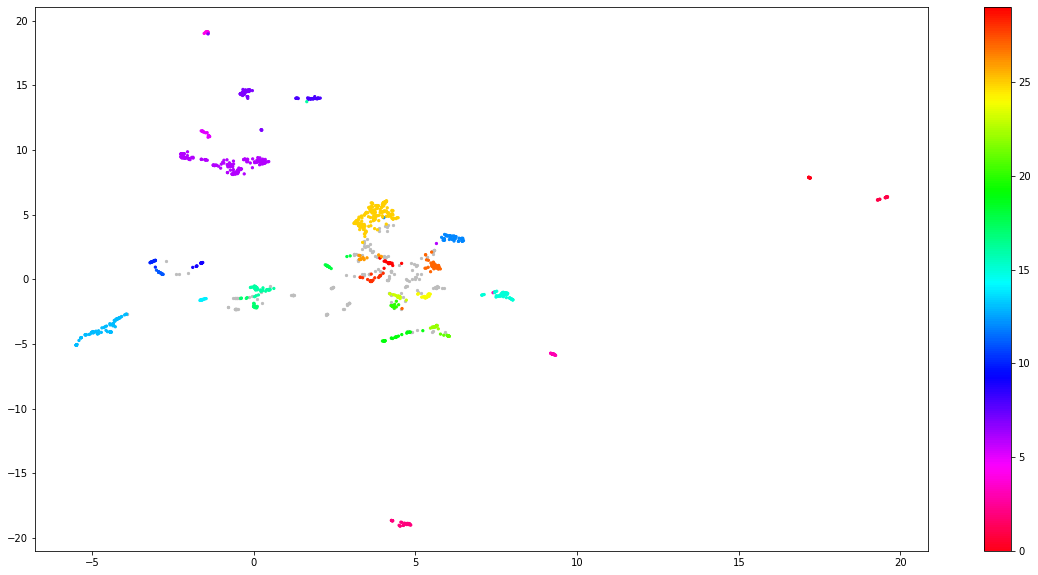

In [73]:
#for_comparison = data_preprocess(could_improve_below_5)
activity_other = list(df["Activity_Other"].dropna())
top_n_words, topic_sizes = custom_topic_model(activity_other)
topic_sizes.head(10)

In [74]:
# This method seems to do a good job extracting some meaningful topics for "Activity_Other" responses. For instance, topic 15 basically is a topic 
# about children activities, and topic 12 talks about memberships and their concerns. 
top_n_words[12][:20]

[('annual', 0.7982219354292401),
 ('pass', 0.5713598125602665),
 ('renew', 0.4220143838591523),
 ('renewed', 0.2528834031727084),
 ('passes', 0.2495153686273509),
 ('privilege', 0.09960333019061517),
 ('obtain', 0.08647052348167253),
 ('membership', 0.07684347930722885),
 ('12th', 0.06140132221100544),
 ('card', 0.05764701565444835),
 ('collected', 0.05764701565444835),
 ('collect', 0.05498329276137631),
 ('15', 0.05498329276137631),
 ('tickets', 0.05291714876772622),
 ('online', 0.05291714876772622),
 ('paid', 0.051228986204819235),
 ('got', 0.04980166509530758),
 ('ticket', 0.04747467964826215),
 ('day', 0.04055602777946381),
 ('saver', 0.033909675830317274)]

In [75]:
# After performing the topic modelling using various techniques, it is evident that while some methods give out good results, it is quite difficult
# to interpret whole topics and results are not very accurate. So now, using semantic search techniques, I will try an experiment to refine the extracted
# topics, using a preconceived notion or abstract notion from above topic modelling techniques. Using an idea from the outputs of the above models,
# I will use semantic search with vector embeddings, to bring together documents containing those words. THEN, I will do topic modelling again to see
# if we get better results. Because currently, there is a lot of information loss. Afterwards, I will try another approach to see using sentiment analysis
# to see if we get some better representations of the underlying topics and compare the methods.

# Semantic Search and Sentiment Analysis 

In [107]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import util
import torch
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Basically embedding similar sentences together based on specified terms/sentences.
def similar_sents(txt,queries,count):
    embedder  = SentenceTransformer('all-MiniLM-L6-v2')
    corpus_embeddings = embedder.encode(txt, convert_to_tensor=True)
    dat_exp = []
    top_k = min(count, len(txt))
    
    for query in queries:
        query_embedding = embedder.encode(query, convert_to_tensor=True)
        # We use cosine-similarity and torch.topk to find the highest 10 scores
        cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
        top_results = torch.topk(cos_scores, k=top_k)

#         print("\n\n======================\n\n")
#         print("Query:", query)
#         print("\nTop most similar sentences in corpus:")

        for score, idx in zip(top_results[0], top_results[1]):
            dat_exp.append(txt[idx])
            #print(txt[idx], "(Score: {:.4f})".format(score))
    return dat_exp

# helper function to get the sentiments for responses in a dataframe
def get_sentiment_df(txt):
    sentiments = SentimentIntensityAnalyzer()
    dat_exp_df = pd.DataFrame(txt)
    dat_exp_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in dat_exp_df[0]]
    dat_exp_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in dat_exp_df[0]]
    dat_exp_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in dat_exp_df[0]]
    return dat_exp_df

# helper function to produce word cloud which will be used later.
def generate_word_cloud(txt,max_words):
    plt.figure(figsize=(12,8))
    cloudtext = ""
    for i in txt:
        cloudtext += i+" "
    
    wordcloud = WordCloud(background_color="black",colormap="Set2", 
                          max_words=max_words, contour_width=0,collocations=True)# Generate a word cloud

    wordcloud.generate(cloudtext) # Visualize the word cloud
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

In [77]:
dat_exp = similar_sents(could_improve_above_5,["weather"],50)
topic_model = topic_model_with_BERT(data_preprocess(dat_exp)) 
topic_model.get_topic_info()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic  Count                         Name
0      0     61   0_weather_rain_today_visit
1      1     12  1_shame_none_excellent_cool

In [78]:
topic_model.get_topic(0)

[('weather', 0.22514624284623488),
 ('rain', 0.10389989486674246),
 ('today', 0.08196258046224283),
 ('visit', 0.06487867846465215),
 ('guarantee', 0.06487867846465215),
 ('cold', 0.06487867846465215),
 ('control', 0.06487867846465215),
 ('cover', 0.06487867846465215),
 ('improve', 0.05529992817056725),
 ('shade', 0.05529992817056725)]

In [79]:
# Now I will use the sentiments. There are some inconsistencies with the sentiments, and it is the prime area of future improvement for this analysis. 
dat_exp_df = get_sentiment_df(dat_exp)
weather_exp = dat_exp_df[dat_exp_df["Negative"]>0.000]
weather_exp

0  Positive  Negative  \
11         No weather was not good but that's England     0.000     0.355   
15                    Pity  unable to control weather     0.000     0.355   
22    The only bad thing about today was the weather.     0.000     0.304   
23  No, we have a lovely day despite the inclement...     0.292     0.169   
24  Unfortunately you can't control the weather!  ...     0.072     0.064   
26                   Some where to sit in bad weather     0.000     0.368   
27  Maybe if you could guarantee the weather altho...     0.285     0.075   
30                                 A rainy day policy     0.000     0.394   
31                                    Stop the rain:)     0.000     0.524   
34  Stop the rain?!\n\nIndoor / under cover (open ...     0.000     0.284   
35  Not really, thoroughly enjoyable day out so lo...     0.000     0.221   
36  The line fir the house tour was too long on a ...     0.000     0.073   
37  No rain! The weather did spoil the visit. Its ...     0.000     0.248   
41  Unfortunately the weather was against us, but ...     0.105     0.047   
44                               No excellent day out     0.468     0.278   
45  We have visited twice in the past week and bee...     0.065     0.085   
46  Queing inm the hot sun is not for everyone... ...     0.000     0.151   
47  None.  Always enjoy my visits, even if weather...     0.000     0.226   

    Neutral  
11    0.645  
15    0.645  
22    0.696  
23    0.538  
24    0.864  
26    0.632  
27    0.641  
30    0.606  
31    0.476  
34    0.716  
35    0.779  
36    0.927  
37    0.752  
41    0.848  
44    0.253  
45    0.850  
46    0.849  
47    0.774

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.



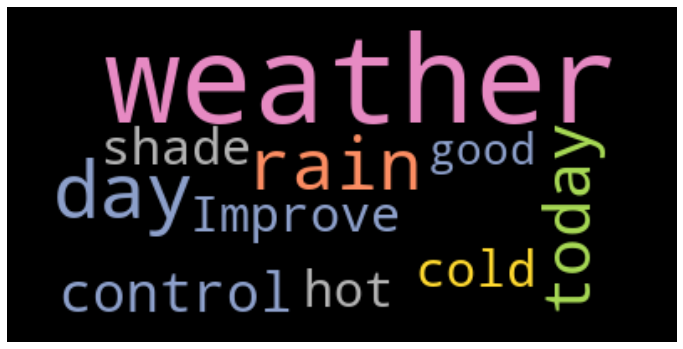

In [80]:
generate_word_cloud(dat_exp_df[0],10)

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:513: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and wi

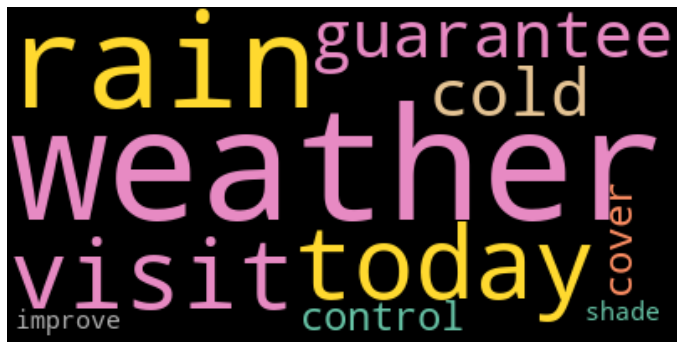

In [81]:
tm = []
for i in topic_model.get_topic(0):
    tm.append(i[0])
generate_word_cloud(tm,10)

In [82]:
# Now lets try for the other response, i.e "CouldImprove" with "ValueForMoney" < 5.0
dat_exp2 = similar_sents(could_improve_below_5,["toilet"],50)
topic_model2 = topic_model_with_BERT(data_preprocess(dat_exp2)) 
topic_model2.get_topic_info()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tawhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic  Count                          Name
0      0     41  0_toilet_facility_park_visit
1     -1     26       -1_toilet_use_open_hand
2      1     14       1_toilet_thank_sign_poo

In [83]:
# I will now try another way to conduct sentiment analysis using pre trained models. 
from transformers import pipeline
sentiment_pipeline = pipeline(task = 'sentiment-analysis',
                     model = 'nlptown/bert-base-multilingual-uncased-sentiment',
                     tokenizer = 'nlptown/bert-base-multilingual-uncased-sentiment')
sent_list = sentiment_pipeline(dat_exp2)
toilet_exp = []
for i,k in enumerate(sent_list):
    if(k["label"]=="1 star"):
        toilet_exp.append(dat_exp2[i])

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\transformers\image_utils.py:188: DeprecationWarning:

BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.



In [84]:
# In this method, the most negative sentiments are held by 1 star labels and the most positive in the sample is denoted by 5 stars. 
sent_list[:5]

[{'label': '4 stars', 'score': 0.3061443567276001},
 {'label': '3 stars', 'score': 0.305232971906662},
 {'label': '3 stars', 'score': 0.305232971906662},
 {'label': '4 stars', 'score': 0.3785192668437958},
 {'label': '1 star', 'score': 0.2314562052488327}]

In [85]:
# We see that this method of using sentiments to get the most negative responses, does work quite well to bring out major concerns in comparison to the
# above method of rule based sentiment analysis.
toilet_exp

['open the toilets',
 'Re open the toilets',
 'No signs for toilets',
 "Toilets at the playground area were absolutely disgusting. Looked like they hadn't been cleaned all day.",
 'More toilets - better information about closures and signposts to attractions such as the Italian Garden should clearly say that they are inaccessible.  I am disabled and it took an enormous amount of effort and pain to walk to that garden... and all for nought!',
 'More toilet facilities! And to not close the toilet facilities before the venue has actually closed! A lot of people were leaving 15 minutes before closing and wanted to use the toilet facilities before setting off on their journey home but the block of 6 toilets had closed leaving only the 1 disabled toilet open on the whole site, this caused a very long and slow moving queue of people needing to use that 1 toilet!',
 'The provision of toilet facilities was lamentable. To have merely half a dozen or so Porterloos available for the amount of visi

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and wi

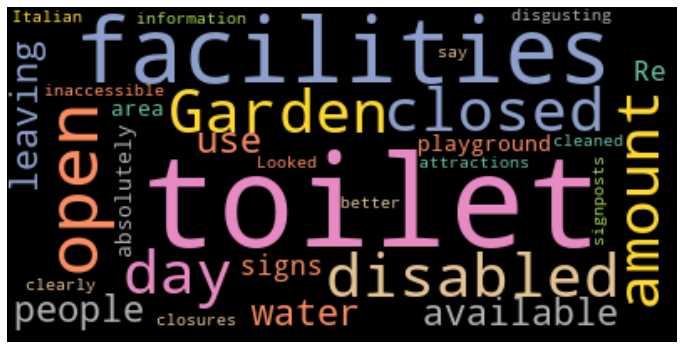

In [108]:
generate_word_cloud(toilet_exp,30)

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\Tawhid\Anaconda3\envs\sample_venv\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and wi

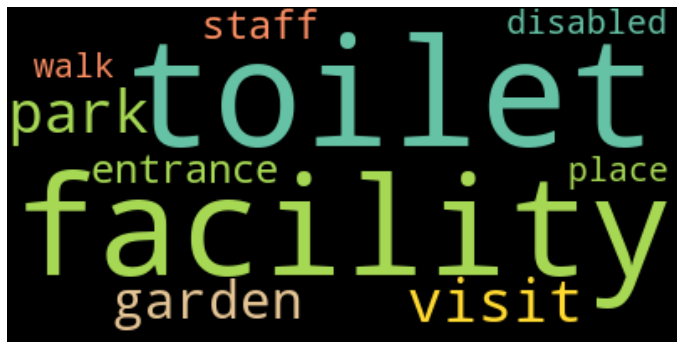

In [87]:
tm2 = []
for i in topic_model2.get_topic(0):
    tm2.append(i[0])
generate_word_cloud(tm2,10)

# Clustering 

In [88]:
cluster_features = ["PartySize","StayTime","ValueForMoney","Activity_TookATour","Activity_VisitedGardens","Activity_WalkedAroundPark",
                    "Activity_Event","Activity_Cafe","Activity_Shop","Activity_Exhibition",
                    "Cafe_Pantry","Cafe_Stables","Cafe_Pizza","Cafe_Orangery","Cafe_CoffeeStall","Cafe_Icecream",
                    "Service_AdmissionsAndWelcome","Service_TourGuide","Service_RetailTeam","Service_CateringTeam","Service_AnnualPass"]
df_for_clustering = df[cluster_features]
df_for_clustering.head(5)

PartySize  StayTime  ValueForMoney  Activity_TookATour  \
1237          6         6            8.0                   0   
34            4         3            9.0                   0   
398           4         4           10.0                   0   
444           2         4            8.0                   1   
33            5         3            8.0                   0   

      Activity_VisitedGardens  Activity_WalkedAroundPark  Activity_Event  \
1237                        0                          0               1   
34                          0                          0               1   
398                         0                          1               1   
444                         0                          0               0   
33                          0                          1               1   

      Activity_Cafe  Activity_Shop  Activity_Exhibition  ...  Cafe_Stables  \
1237              1              1                    0  ...             1   
34                0              0                    0  ...             0   
398               1              0                    1  ...             1   
444               1              1                    0  ...             1   
33                0              0                    0  ...             1   

      Cafe_Pizza  Cafe_Orangery  Cafe_CoffeeStall  Cafe_Icecream  \
1237           0              0                 0              0   
34             0              0                 0              0   
398            0              0                 0              0   
444            0              0                 0              0   
33             0              0                 0              0   

      Service_AdmissionsAndWelcome  Service_TourGuide  Service_RetailTeam  \
1237                           9.0               10.0                 9.0   
34                            10.0                9.0                 NaN   
398                            9.0               10.0                10.0   
444                            9.0               10.0                 9.0   
33                             9.0                9.0                 9.0   

      Service_CateringTeam  Service_AnnualPass  
1237                   8.0                10.0  
34                     NaN                10.0  
398                    9.0                10.0  
444                    8.0                 9.0  
33                     7.0                10.0  

[5 rows x 21 columns]

In [89]:
# we cant have null values, so dropping the null for all the features
df_for_clustering = df_for_clustering.dropna()
df_for_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 1237 to 17617
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PartySize                     5363 non-null   int64  
 1   StayTime                      5363 non-null   int64  
 2   ValueForMoney                 5363 non-null   float64
 3   Activity_TookATour            5363 non-null   int64  
 4   Activity_VisitedGardens       5363 non-null   int64  
 5   Activity_WalkedAroundPark     5363 non-null   int64  
 6   Activity_Event                5363 non-null   int64  
 7   Activity_Cafe                 5363 non-null   int64  
 8   Activity_Shop                 5363 non-null   int64  
 9   Activity_Exhibition           5363 non-null   int64  
 10  Cafe_Pantry                   5363 non-null   int64  
 11  Cafe_Stables                  5363 non-null   int64  
 12  Cafe_Pizza                    5363 non-null   int64  
 13 

In [90]:
from sklearn.cluster import KMeans
X1 = df_for_clustering.iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

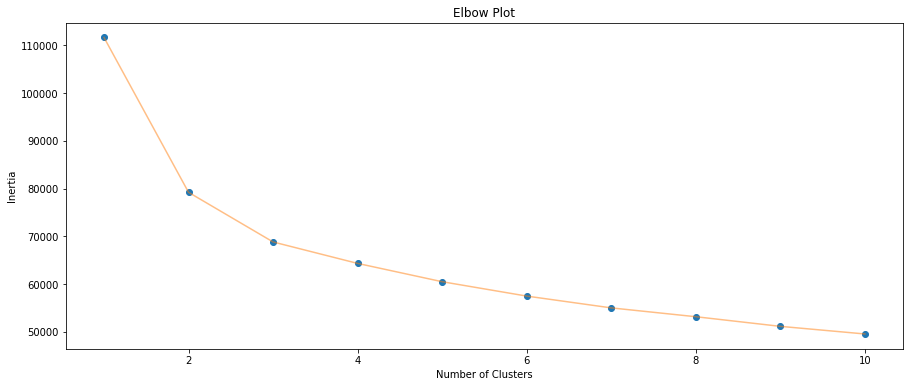

In [109]:
# Lets plot the elbow plot to pick an optimum number of clusters
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title("Elbow Plot")
plt.show()

In [92]:
# From the elbow plot we see that it is safe to use k=4 for this problem, as the first major flattening out starts at k=4.
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

#assigning the labels in the dataframe
df_for_clustering["cluster"] = labels1

In [93]:
df_for_clustering[df_for_clustering["cluster"]==3]

PartySize  StayTime  ValueForMoney  Activity_TookATour  \
1237           6         6            8.0                   0   
444            2         4            8.0                   1   
33             5         3            8.0                   0   
82             4         6            4.0                   0   
92             4         6            7.0                   1   
...          ...       ...            ...                 ...   
17551          2         4            7.0                   1   
17566          2         3            8.0                   0   
17579          4         4            6.0                   0   
17600          5         2            8.0                   0   
17604          2         1            5.0                   0   

       Activity_VisitedGardens  Activity_WalkedAroundPark  Activity_Event  \
1237                         0                          0               1   
444                          0                          0               0   
33                           0                          1               1   
82                           0                          0               0   
92                           1                          1               0   
...                        ...                        ...             ...   
17551                        1                          1               0   
17566                        1                          0               0   
17579                        1                          1               0   
17600                        0                          1               0   
17604                        0                          0               0   

       Activity_Cafe  Activity_Shop  Activity_Exhibition  ...  Cafe_Pizza  \
1237               1              1                    0  ...           0   
444                1              1                    0  ...           0   
33                 0              0                    0  ...           0   
82                 0              0                    1  ...           0   
92                 1              1                    0  ...           0   
...              ...            ...                  ...  ...         ...   
17551              1              1                    0  ...           0   
17566              1              1                    1  ...           0   
17579              1              0                    0  ...           0   
17600              0              0                    0  ...           0   
17604              0              0                    0  ...           0   

       Cafe_Orangery  Cafe_CoffeeStall  Cafe_Icecream  \
1237               0                 0              0   
444                0                 0              0   
33                 0                 0              0   
82                 0                 0              0   
92                 0                 0              0   
...              ...               ...            ...   
17551              0                 0              0   
17566              0                 0              0   
17579              0                 0              0   
17600              1                 0              0   
17604              0                 0              0   

       Service_AdmissionsAndWelcome  Service_TourGuide  Service_RetailTeam  \
1237                            9.0               10.0                 9.0   
444                             9.0               10.0                 9.0   
33                              9.0                9.0                 9.0   
82                              9.0                9.0                 9.0   
92                              9.0                9.0                 9.0   
...                             ...                ...                 ...   
17551                          10.0               10.0                 9.0   
17566                           9.0                9.0             

# Modelling "ValueForMoney" with other features and will try to understand the importances of the features.

In [94]:
model_features = df.copy()
model_features.drop(["MostEnjoyed","CouldImprove","UseShopMore","UseCafeMore","Activity_Other",
                     "VisitDate","VisitFrequency","VisitorSegment"], axis=1,inplace=True)

In [95]:
model_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17619 entries, 1237 to 17618
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   VisitType                     17619 non-null  object 
 1   ChildrenUnder12               17619 non-null  object 
 2   PartySize                     17619 non-null  int64  
 3   StayTime                      17619 non-null  int64  
 4   OverallNPS                    17618 non-null  float64
 5   CateringNPS                   8860 non-null   float64
 6   RetailNPS                     17619 non-null  int64  
 7   ValueForMoney                 17618 non-null  float64
 8   Activity_TookATour            17619 non-null  int64  
 9   Activity_VisitedGardens       17619 non-null  int64  
 10  Activity_WalkedAroundPark     17619 non-null  int64  
 11  Activity_Event                17619 non-null  int64  
 12  Activity_Cafe                 17619 non-null  int64  
 13

In [96]:
model_features = pd.get_dummies(model_features, columns = ["VisitType","ChildrenUnder12"], drop_first = True)
model_features.dropna(inplace=True)

In [97]:
X = model_features.drop(["ValueForMoney"],axis=1)
y = model_features[["ValueForMoney"]]

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ",X_test.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of y_test is ",y_test.shape)

The shape of X_train is  (2604, 25)
The shape of X_test is  (652, 25)
The shape of y_train is  (2604, 1)
The shape of y_test is  (652, 1)


In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [100]:
classifiers=[['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()]]
cla_pred=[]
for name, model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Decision Tree Classification : 0.25766871165644173
Random Forest Classification : 0.37576687116564417
Gradient Boosting Classification : 0.39723926380368096
K-Neighbors Classification : 0.3312883435582822
Support Vector Classification : 0.3895705521472393


Text(0.5, 1.0, 'model comparisons')

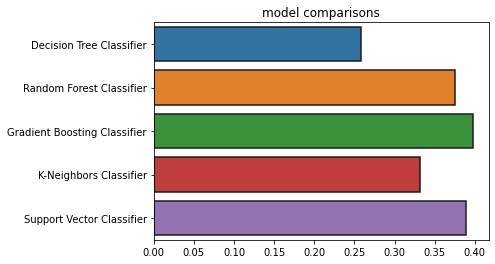

In [110]:
y_ax=['Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'K-Neighbors Classifier',
      'Support Vector Classifier']
x_ax = cla_pred
sns.barplot(x_ax,y_ax,linewidth=1.5,edgecolor="0.1")
plt.title("model comparisons")

# Model Interpretability with SHAPLEY values

In [ ]:
#pip install shap
import shap
shap.initjs()
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")